In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')

#**EDA Process**

In [ ]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df.shape

(32581, 12)

#**Check distribution of data**

In [ ]:
for i in df.select_dtypes(include=np.number).columns:
  fig = px.histogram(
                   df,
                   x=df[i].name,
                   nbins=30,
                   title=f"Distribution of {df[i].name}",
                   color_discrete_sequence=['#1f77b4'])

  fig.update_layout(
    showlegend=False,
    xaxis_title=df[i].name,
    yaxis_title="Count",
    bargap=0.1)

  fig.show()


##Check outliers with **Quartile** method and **Box plot**

In [ ]:
def outliers(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

len_outliers = {}

for i in df.select_dtypes(include=np.number).columns:
  outliers_iqr = outliers(df, i)
  len_outliers[i] = len(outliers_iqr)

len_outliers

{'person_age': 1494,
 'person_income': 1484,
 'person_emp_length': 853,
 'loan_amnt': 1689,
 'loan_int_rate': 6,
 'loan_status': 7108,
 'loan_percent_income': 651,
 'cb_person_cred_hist_length': 1142}

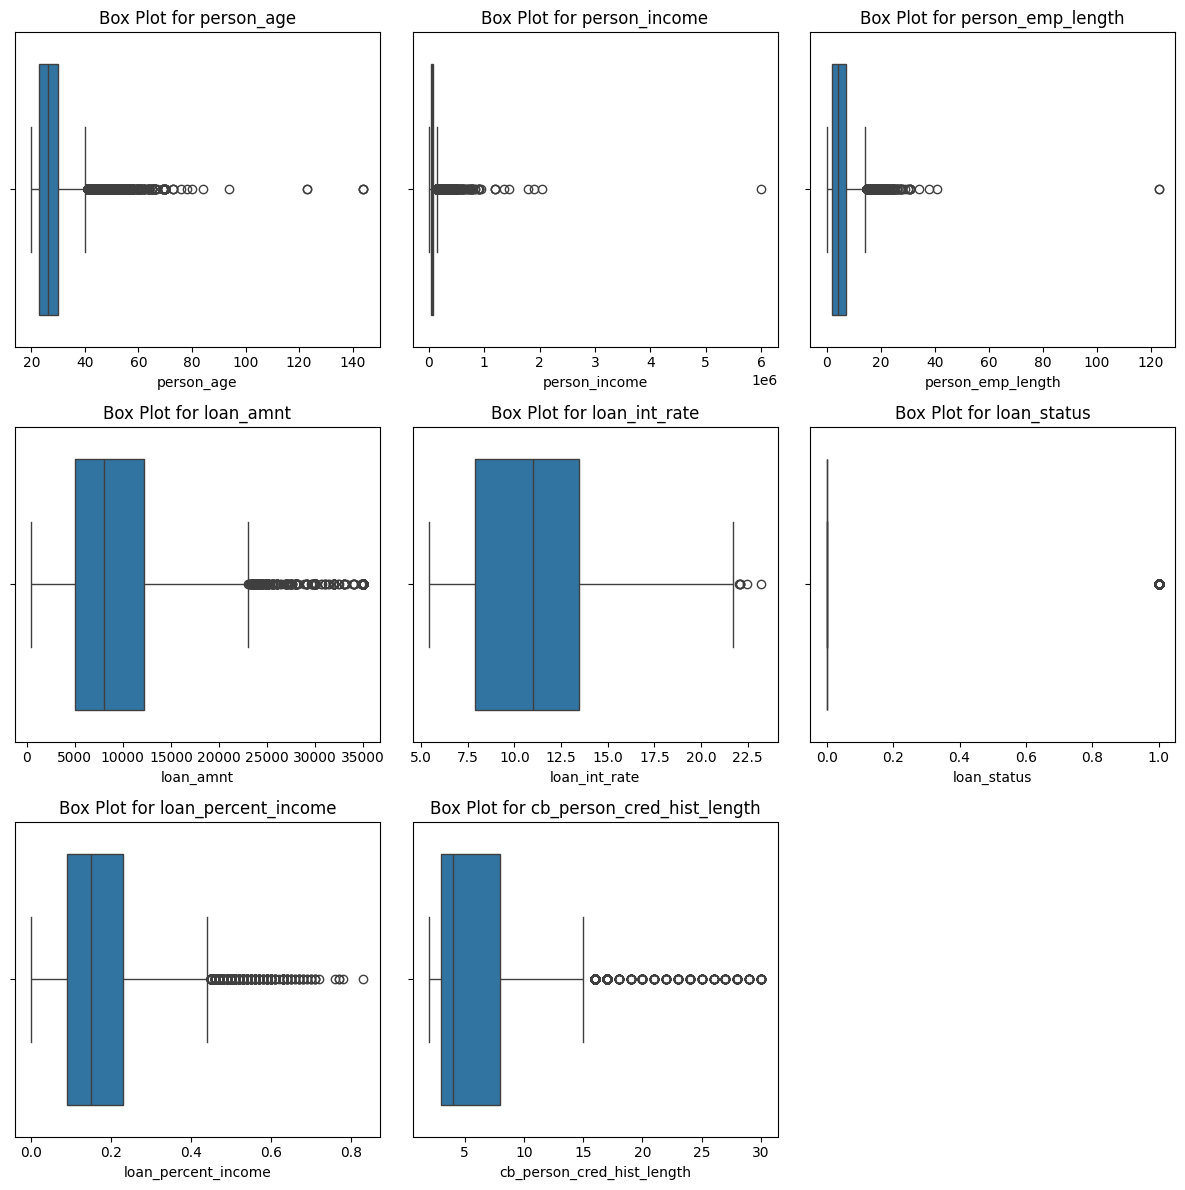

In [ ]:
#Check outliers

plt.figure(figsize=(12, 12)) # Increased figure size
numeric_cols = df.select_dtypes(include=np.number).columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)  # Create subplots dynamically
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

In [ ]:
#The column is another target columns so we don't use it for prediction process

df.drop(columns=['loan_status'], inplace=True)
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

#Data analysis process with Data visualization:

In [ ]:
fig = px.scatter(
    df,
    x='loan_amnt',
    y='person_age'
)

# Show the plot
fig.show()

In [ ]:
fig = px.scatter(
    df,
    x='loan_grade',
    y='loan_amnt',
    color='loan_grade'
)

# Show the plot
fig.show()

In [ ]:
top_5_grade = df['loan_grade'].value_counts().nlargest(5).reset_index(name='grade_count')
top_5_grade

,loan_grade,grade_count
0,A,10777
1,B,10451
2,C,6458
3,D,3626
4,E,964


In [ ]:
fig = px.bar(
             top_5_grade,
             x='loan_grade',
             y='grade_count',
             title='Top 5 Loan Grades by Count',
             labels={'index': 'Loan Grade', 'grade_count': 'Count'},
             color='grade_count',
             color_continuous_scale='Viridis')

fig.show()

In [ ]:
top_house_5 = df['person_home_ownership'].value_counts().nlargest(5).reset_index(name='house_count')
top_house_5

,person_home_ownership,house_count
0,RENT,16446
1,MORTGAGE,13444
2,OWN,2584
3,OTHER,107


In [ ]:
fig = px.bar(
             top_house_5,
             x='person_home_ownership',
             y='house_count',
             title='Top 5 House_own by Count',
             color='house_count',
             color_continuous_scale='Viridis'
             )

fig.show()

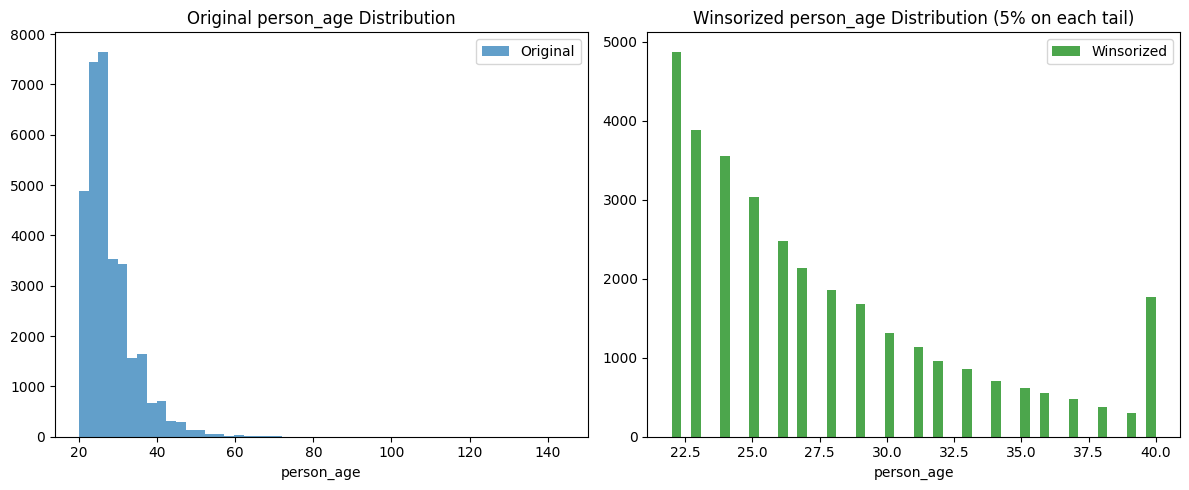

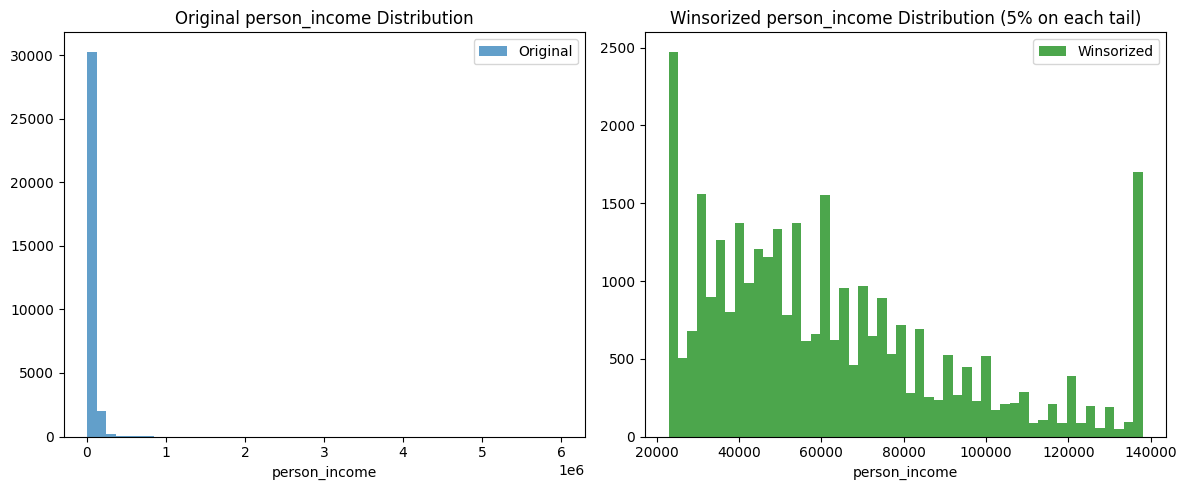

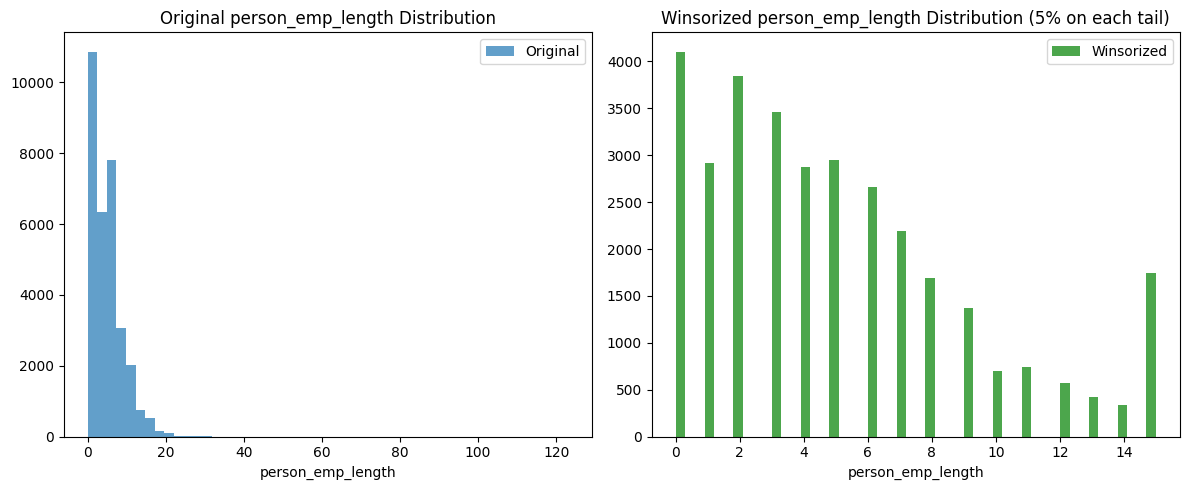

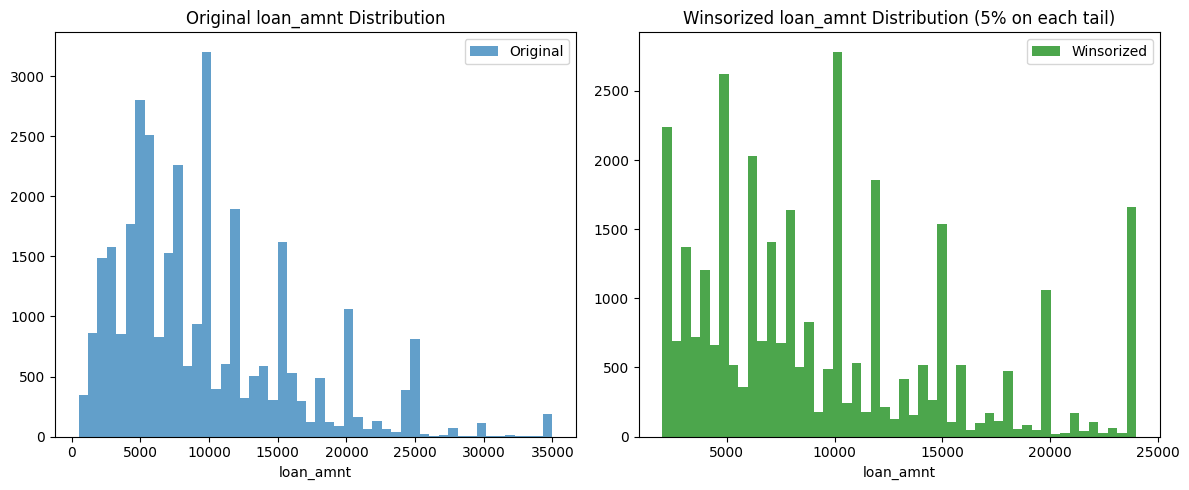

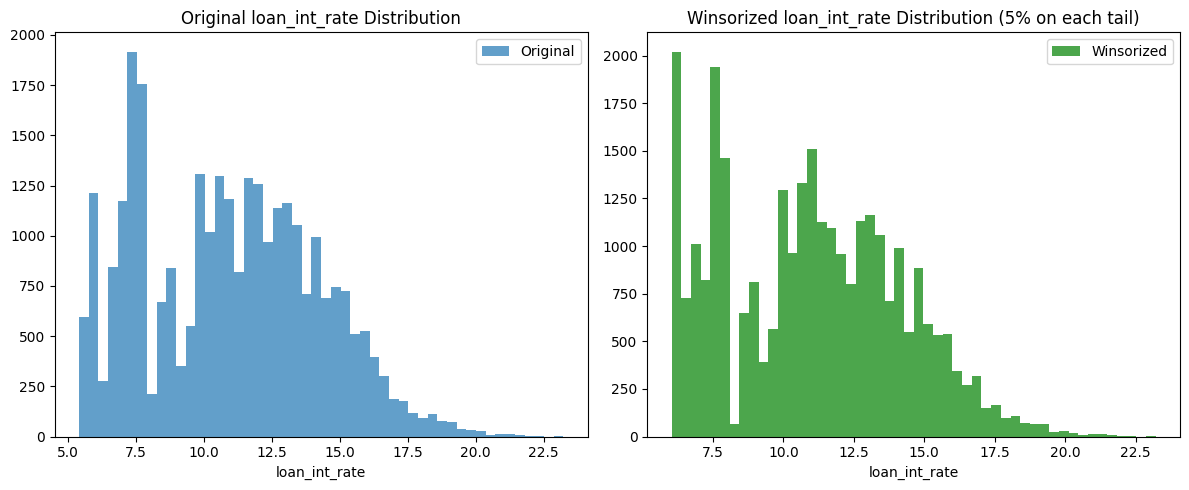

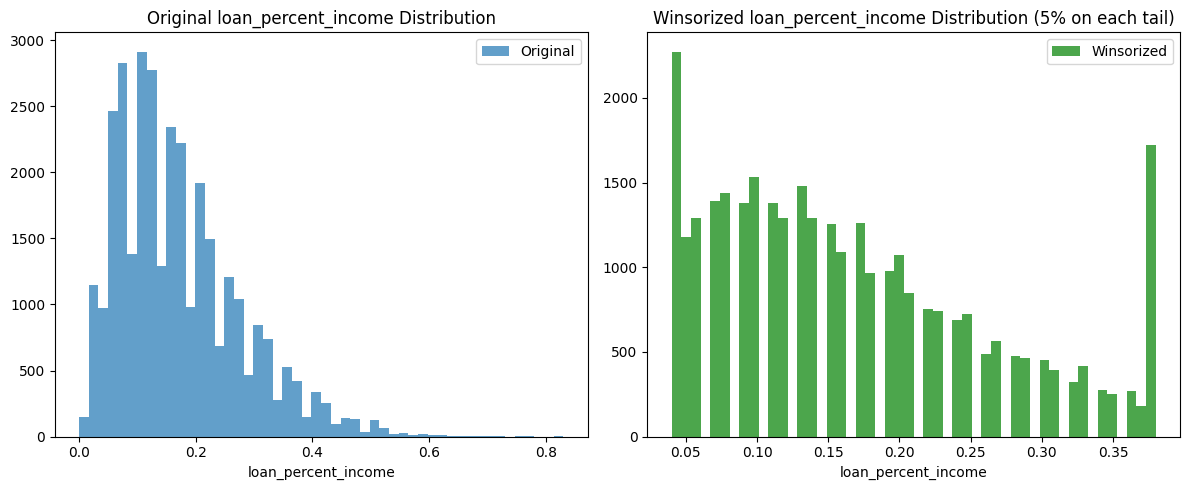

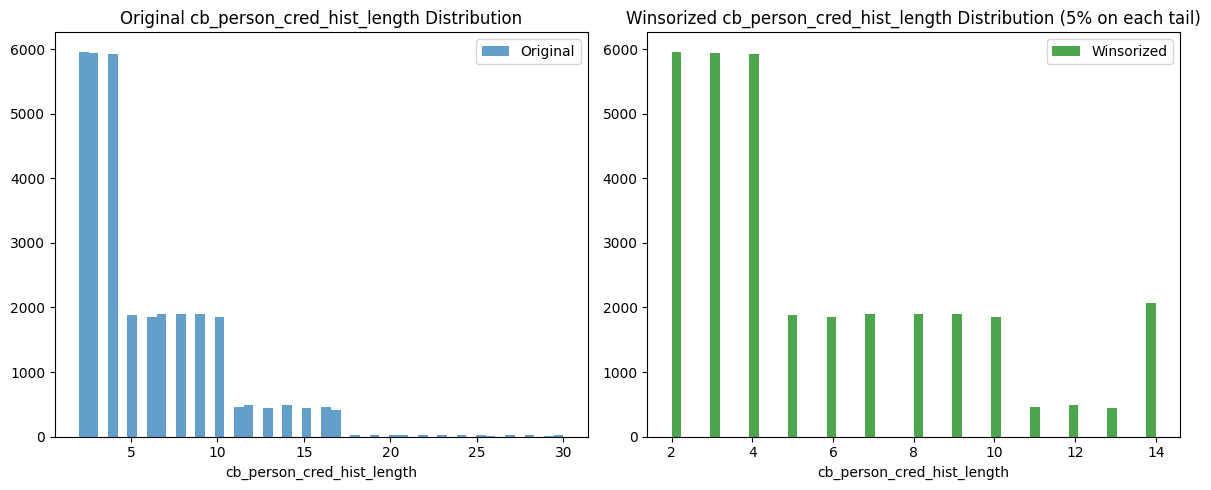

In [ ]:
#Solve outliers method
from scipy.stats import mstats

def winsorize_column(data, column, limits=(0.05, 0.05)):
    """Apply winsorization to handle extreme values"""
    return mstats.winsorize(data[column], limits=limits)


df_win = df.copy()

num_col = df.select_dtypes(include=np.number)

for i in  num_col.columns:
    df_win[i] = winsorize_column(df_win, i)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Original column distribution
    ax1.hist(df[i], bins=50, alpha=0.7, label='Original')
    ax1.set_title(f'Original {i} Distribution')
    ax1.set_xlabel(i)
    ax1.legend()

    # Winsorized column distribution
    ax2.hist(df_win[i], bins=50, alpha=0.7, color='green', label='Winsorized')
    ax2.set_title(f'Winsorized {i} Distribution (5% on each tail)')
    ax2.set_xlabel(i)
    ax2.legend()

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

##Split train_test all dataset and do all **feature engineering** process step by step

In [ ]:
X = df.drop('loan_amnt', axis=1)
y = df['loan_amnt']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_percent_income,0
cb_person_default_on_file,0


#Use different methods for null values

In [ ]:
from sklearn.impute import SimpleImputer

median_imp = SimpleImputer(strategy='median')

# Simple imputer method train
X_train[['emp_len_median', 'loan_int_Rate_median']] = median_imp.fit_transform(X_train[['person_emp_length', 'loan_int_rate']])

# Simple imputer method test
X_test[['emp_len_median', 'loan_int_Rate_median']] = median_imp.transform(X_test[['person_emp_length', 'loan_int_rate']])



In [ ]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(n_neighbors=5)

# KNN imputation method for train
X_train[['emp_len_knn', 'loan_int_Rate_knn']] = knn_imp.fit_transform(X_train[['person_emp_length', 'loan_int_rate']])

# KNN imputation method for test
X_test[['emp_len_knn', 'loan_int_Rate_knn']] = knn_imp.transform(X_test[['person_emp_length', 'loan_int_rate']])


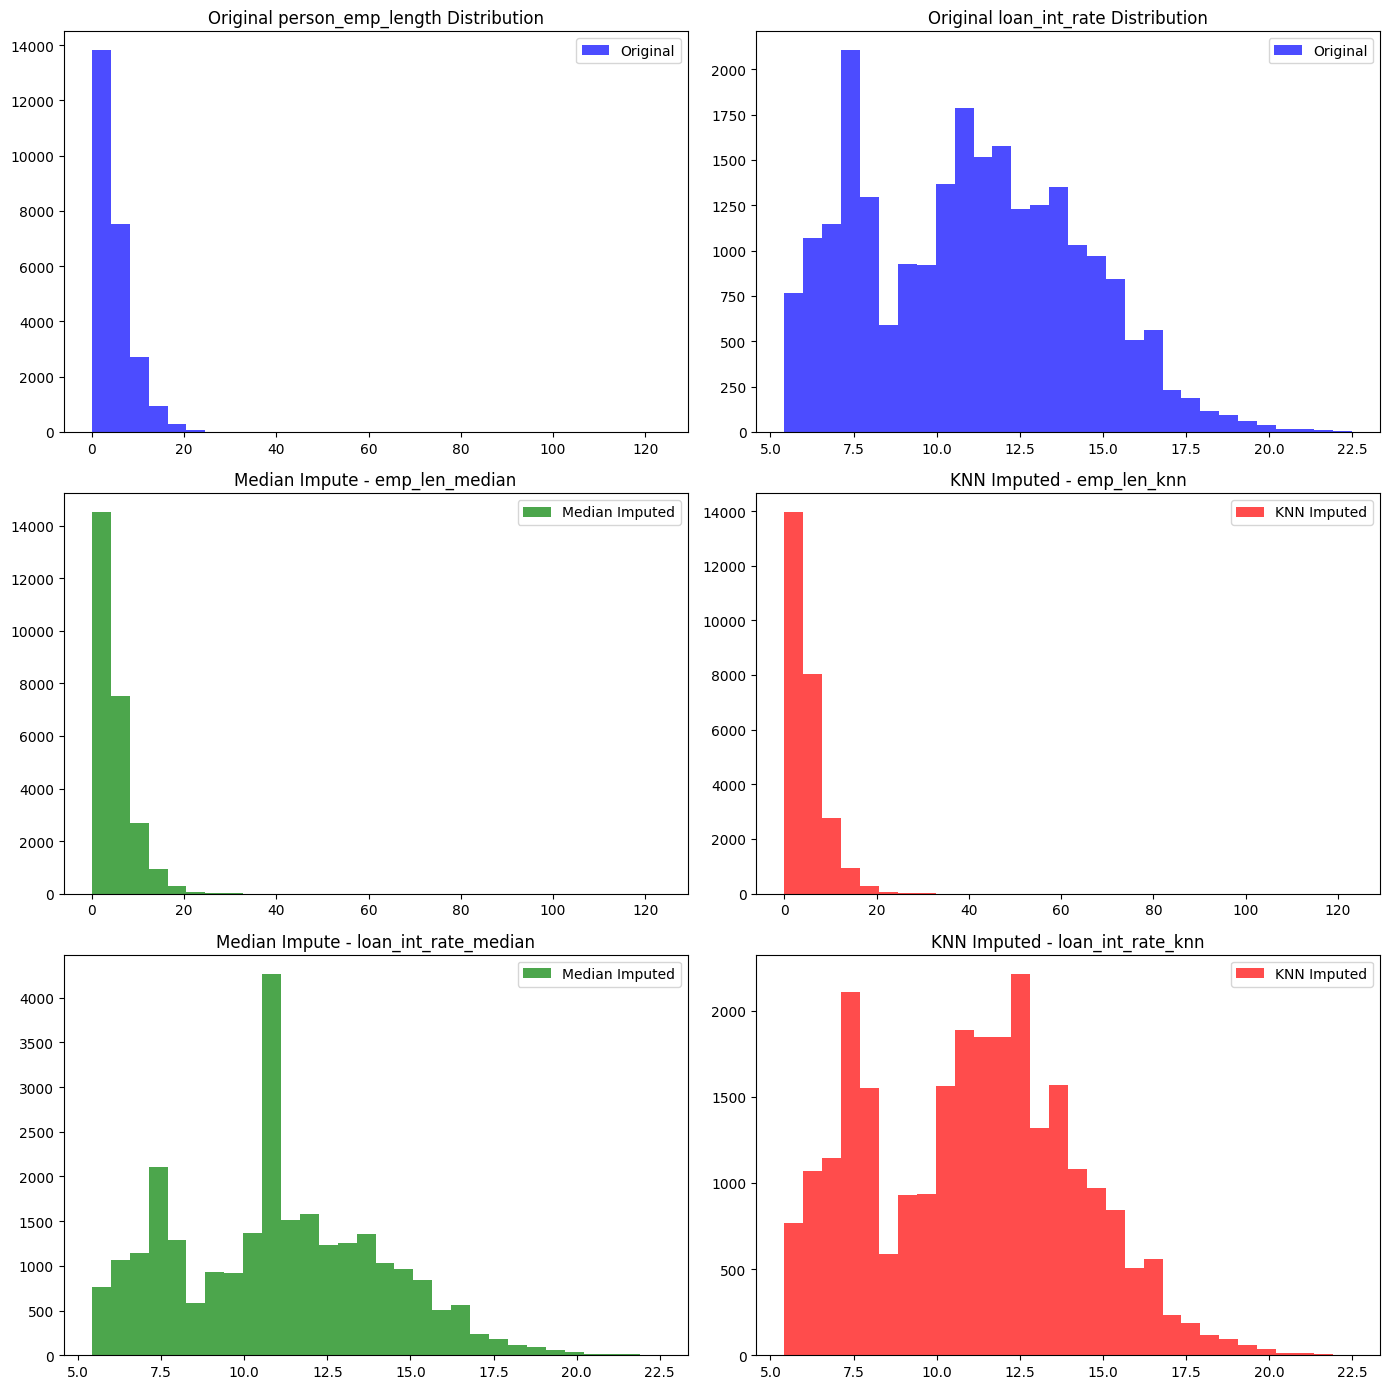

In [ ]:
import matplotlib.pyplot as plt

# Create 3x2 grid of subplots to fit both features
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Plot for Original 'person_emp_length'
axes[0, 0].hist(X_train['person_emp_length'].dropna(), bins=30, alpha=0.7, label='Original', color='blue')
axes[0, 0].set_title('Original person_emp_length Distribution')
axes[0, 0].legend()

# Plot for Median Imputed 'emp_len_median'
axes[1, 0].hist(X_train['emp_len_median'], bins=30, alpha=0.7, color='green', label='Median Imputed')
axes[1, 0].set_title('Median Impute - emp_len_median')
axes[1, 0].legend()

# Plot for KNN Imputed 'emp_len_knn'
axes[1, 1].hist(X_train['emp_len_knn'], bins=30, alpha=0.7, color='red', label='KNN Imputed')
axes[1, 1].set_title('KNN Imputed - emp_len_knn')
axes[1, 1].legend()

# Plot for Original 'loan_int_rate'
axes[0, 1].hist(X_train['loan_int_rate'].dropna(), bins=30, alpha=0.7, label='Original', color='blue')
axes[0, 1].set_title('Original loan_int_rate Distribution')
axes[0, 1].legend()

# Plot for Median Imputed 'loan_int_rate_median'
axes[2, 0].hist(X_train['loan_int_Rate_median'], bins=30, alpha=0.7, color='green', label='Median Imputed')
axes[2, 0].set_title('Median Impute - loan_int_rate_median')
axes[2, 0].legend()

# Plot for KNN Imputed 'loan_int_rate_knn'
axes[2, 1].hist(X_train['loan_int_Rate_knn'], bins=30, alpha=0.7, color='red', label='KNN Imputed')
axes[2, 1].set_title('KNN Imputed - loan_int_rate_knn')
axes[2, 1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


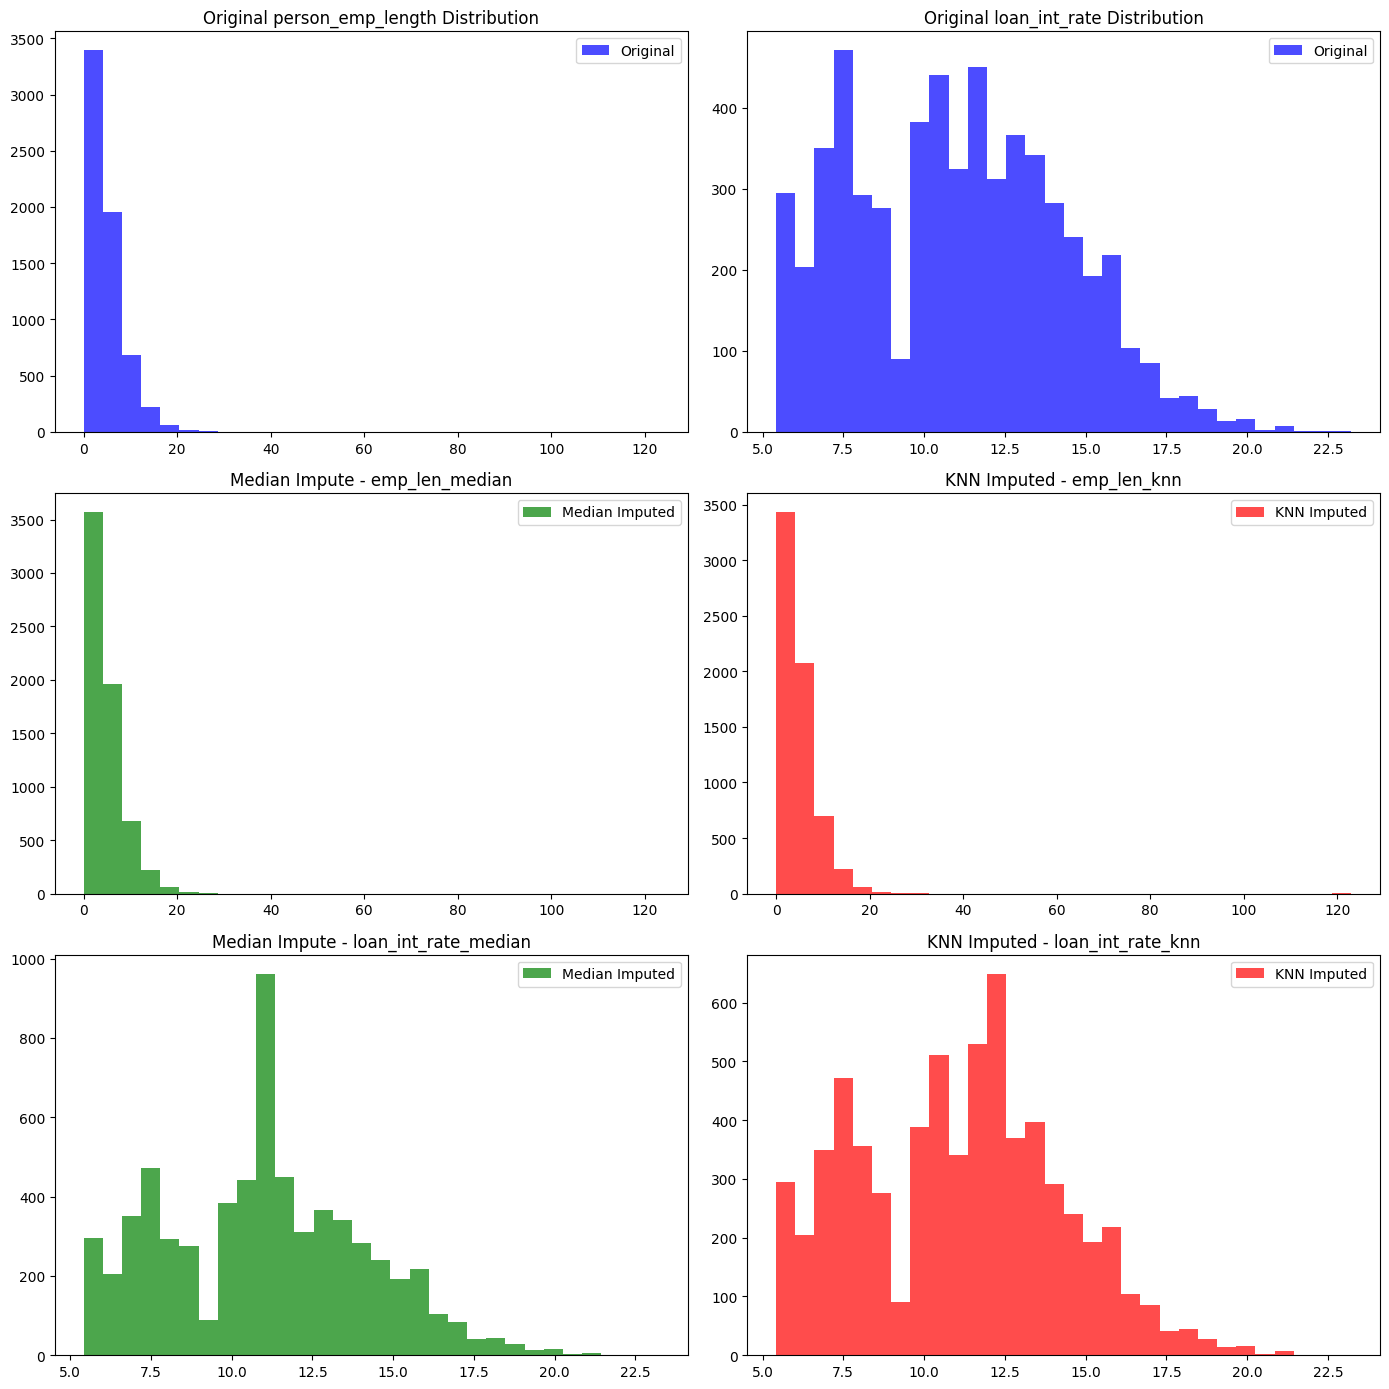

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Plot for Original 'person_emp_length'
axes[0, 0].hist(X_test['person_emp_length'].dropna(), bins=30, alpha=0.7, label='Original', color='blue')
axes[0, 0].set_title('Original person_emp_length Distribution')
axes[0, 0].legend()

# Plot for Median Imputed 'emp_len_median'
axes[1, 0].hist(X_test['emp_len_median'], bins=30, alpha=0.7, color='green', label='Median Imputed')
axes[1, 0].set_title('Median Impute - emp_len_median')
axes[1, 0].legend()

# Plot for KNN Imputed 'emp_len_knn'
axes[1, 1].hist(X_test['emp_len_knn'], bins=30, alpha=0.7, color='red', label='KNN Imputed')
axes[1, 1].set_title('KNN Imputed - emp_len_knn')
axes[1, 1].legend()

# Plot for Original 'loan_int_rate'
axes[0, 1].hist(X_test['loan_int_rate'].dropna(), bins=30, alpha=0.7, label='Original', color='blue')
axes[0, 1].set_title('Original loan_int_rate Distribution')
axes[0, 1].legend()

# Plot for Median Imputed 'loan_int_rate_median'
axes[2, 0].hist(X_test['loan_int_Rate_median'], bins=30, alpha=0.7, color='green', label='Median Imputed')
axes[2, 0].set_title('Median Impute - loan_int_rate_median')
axes[2, 0].legend()

# Plot for KNN Imputed 'loan_int_rate_knn'
axes[2, 1].hist(X_test['loan_int_Rate_knn'], bins=30, alpha=0.7, color='red', label='KNN Imputed')
axes[2, 1].set_title('KNN Imputed - loan_int_rate_knn')
axes[2, 1].legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
#Delete extra columns just keep KNN olumns

X_train.drop(columns=['loan_int_Rate_median', 'emp_len_median', 'loan_intent', 'person_emp_length'], inplace=True)
X_train.drop(columns=['loan_int_rate'], inplace=True)

In [ ]:
#Delete extra columns just keep KNN olumns

X_test.drop(columns=['loan_int_Rate_median', 'emp_len_median', 'loan_intent', 'person_emp_length'], inplace=True)
X_test.drop(columns=['loan_int_rate'], inplace=True)

#Correlation matrix

In [ ]:
numerical_cols = X_train.select_dtypes(include=np.number)
corr_matrix = X_train[numerical_cols.columns].corr()

fig = go.Figure(
    data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmid=0,
    text=corr_matrix.values.round(2),
    texttemplate='%{text}',
    textfont={"size": 10},
    reversescale=True
))

fig.update_layout(
    title='Correlation Matrix of Movie Features',
    width=800,
    height=700
)
fig.show()

##Apply **scale** method for some certain columns

In [ ]:
#Scaling process for train_test_dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Train data part
nums_col = X_train.select_dtypes(include=np.number).drop(columns=['loan_percent_income']).columns
X_train_scaled = X_train.copy()
X_train_scaled[nums_col] = scaler.fit_transform(X_train[nums_col])


#Test data part
nums_col = X_test.select_dtypes(include=np.number).drop(columns=['loan_percent_income']).columns
X_test_scaled = X_test.copy()
X_test_scaled[nums_col] = scaler.transform(X_test[nums_col])



In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_home = OrdinalEncoder(categories=[['OTHER', 'RENT', 'MORTGAGE', 'OWN']])
ordinal_grade = OrdinalEncoder(categories=[['G','F','E','D','C','B','A']])

#Ordinal encoding for train part
X_train_scaled['person_home_ownership'] = ordinal_home.fit_transform(X_train_scaled[['person_home_ownership']])
X_train_scaled['loan_grade'] = ordinal_grade.fit_transform(X_train_scaled[['loan_grade']])
X_train_scaled['cb_person_default_on_file'] = X_train_scaled['cb_person_default_on_file'].map({'Y' : 1, 'N' : 0})


X_test_scaled['person_home_ownership'] = ordinal_home.fit_transform(X_test_scaled[['person_home_ownership']])
X_test_scaled['loan_grade'] = ordinal_grade.fit_transform(X_test_scaled[['loan_grade']])
X_test_scaled['cb_person_default_on_file'] = X_test_scaled['cb_person_default_on_file'].map({'Y' : 1, 'N' : 0})



In [ ]:
X_train_scaled.head(5)

,person_age,person_income,person_home_ownership,loan_grade,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_len_knn,loan_int_Rate_knn
32377,5.668518,-0.317177,1.0,4.0,0.10,1,4.484977,-0.689563,0.004204
1338,-0.276062,-0.631652,3.0,2.0,0.33,0,-0.694755,-1.180633,1.726479
7047,-0.745371,-0.238558,2.0,4.0,0.31,1,-0.694755,-0.444028,0.653270
8225,-0.901808,-0.159877,2.0,6.0,0.11,0,-0.448101,0.292578,-1.027234
7178,-0.588935,0.201707,1.0,4.0,0.09,0,-0.694755,-0.444028,0.470118


In [ ]:
X_test_scaled.head(5)

,person_age,person_income,person_home_ownership,loan_grade,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,emp_len_knn,loan_int_Rate_knn
14668,-0.588935,-0.600204,3.0,5.0,0.36,0,-0.941409,0.292578,-0.227147
24614,-0.119626,-0.034150,1.0,4.0,0.16,1,1.031822,-1.180633,1.347322
11096,-0.276062,0.091640,2.0,3.0,0.22,0,-0.694755,1.274719,0.652628
10424,-0.745371,-0.600267,1.0,6.0,0.36,0,-0.941409,0.538113,0.387217
26007,0.349683,-0.340762,1.0,2.0,0.29,0,0.045207,-0.689563,1.684708


In [ ]:
X_test_final = X_test_scaled.copy()
X_train_final = X_train_scaled.copy()

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)
y_pred_lr = lr_model.predict(X_test_final)

print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R-squared (R²):", r2_score(y_test, y_pred_lr))


Linear Regression Metrics:
Mean Absolute Error (MAE): 2873.8561255150016
Mean Squared Error (MSE): 18015728.691876803
Root Mean Squared Error (RMSE): 4244.493926474251
R-squared (R²): 0.5528057250536923


In [ ]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets


y_train_pred = lr_model.predict(X_train_final)
y_test_pred = lr_model.predict(X_test_final)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 2866.583028686248
MSE: 19134618.852980413
RMSE: 4374.313529341537
R²: 0.5202818499368457

Test Data Evaluation Metrics:
MAE: 2873.8561255150016
MSE: 18015728.691876803
RMSE: 4244.493926474251
R²: 0.5528057250536923


Check dataset with Tree ML model

In [ ]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_final, y_train)
y_pred_dt = dt_model.predict(X_test_final)

print("Decision Tree Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dt))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R-squared (R²):", r2_score(y_test, y_pred_dt))


Decision Tree Regressor Metrics:
Mean Absolute Error (MAE): 173.76093294460642
Mean Squared Error (MSE): 260613.2039281878
Root Mean Squared Error (RMSE): 510.5028931633863
R-squared (R²): 0.9935309453885899


In [ ]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = dt_model.predict(X_train_final)
y_test_pred = dt_model.predict(X_test_final)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")



Training Data Evaluation Metrics:
MAE: 0.007673419275629221
MSE: 0.7673419275629221
RMSE: 0.8759805520460612
R²: 0.9999999807622063

Test Data Evaluation Metrics:
MAE: 173.76093294460642
MSE: 260613.2039281878
RMSE: 510.5028931633863
R²: 0.9935309453885899


Check dataset with Random Forest Regressor

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train)
y_pred_rf = rf_model.predict(X_test_final)

print("Random Forest Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R-squared (R²):", r2_score(y_test, y_pred_rf))


Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 156.60748555061122
Mean Squared Error (MSE): 154288.52634140622
Root Mean Squared Error (RMSE): 392.79578198016105
R-squared (R²): 0.9961701829079559


In [ ]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = rf_model.predict(X_train_final)
y_test_pred = rf_model.predict(X_test_final)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 61.75953230509515
MSE: 22660.815144180026
RMSE: 150.53509605464112
R²: 0.9994318776661603

Test Data Evaluation Metrics:
MAE: 156.60748555061122
MSE: 154288.52634140622
RMSE: 392.79578198016105
R²: 0.9961701829079559


Check dataset with Boosting Regressor(Boosting) model

In [ ]:
# Gradient Boosting Regressor (Boosting)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_final, y_train)
y_pred_gb = gb_model.predict(X_test_final)

print("Gradient Boosting Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R-squared (R²):", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 338.79689402894775
Mean Squared Error (MSE): 330233.05362967
Root Mean Squared Error (RMSE): 574.6590760004318
R-squared (R²): 0.9918028111153887


In [ ]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = gb_model.predict(X_train_final)
y_test_pred = gb_model.predict(X_test_final)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 329.57416555548537
MSE: 280443.2230109052
RMSE: 529.5689029870477
R²: 0.9929690941233676

Test Data Evaluation Metrics:
MAE: 338.79689402894775
MSE: 330233.05362967
RMSE: 574.6590760004318
R²: 0.9918028111153887


Bagging

In [ ]:
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(),
                                 n_estimators=100,
                                 random_state=42)

# Fit the Bagging Regressor on the training data
bagging_model.fit(X_train_final, y_train)

# Predict on the test data
y_pred_bagging = bagging_model.predict(X_test_final)

# Print metrics for the Bagging Regressor
print("Bagging Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_bagging))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_bagging))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_bagging)))
print("R-squared (R²):", r2_score(y_test, y_pred_bagging))

Bagging Regressor Metrics:
Mean Absolute Error (MAE): 156.24029717150017
Mean Squared Error (MSE): 152949.2566045641
Root Mean Squared Error (RMSE): 391.0872749202716
R-squared (R²): 0.9962034268454711


In [ ]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = bagging_model.predict(X_train_final)
y_test_pred = bagging_model.predict(X_test_final)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 61.75084535502353
MSE: 22726.8327651597
RMSE: 150.754213092569
R²: 0.9994302225586689

Test Data Evaluation Metrics:
MAE: 156.24029717150017
MSE: 152949.2566045641
RMSE: 391.0872749202716
R²: 0.9962034268454711


In [ ]:
base_learners = [
    ('lr', LinearRegression()),  # Linear Regression
    ('dt', DecisionTreeRegressor(random_state=42)),  # Decision Tree
    ('knn', KNeighborsRegressor())  # K-Nearest Neighbors
]

# Define the meta-model (we use Linear Regression as an example)
meta_model = LinearRegression()

# Create the Stacking Regressor model
stacked_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

# Fit the stacking regressor model on the training data
stacked_model.fit(X_train_final, y_train)

# Predict on the test data
y_pred_stacked = stacked_model.predict(X_test_final)

# Print metrics for the Stacking Regressor
print("Stacking Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_stacked))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_stacked))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_stacked)))
print("R-squared (R²):", r2_score(y_test, y_pred_stacked))

Stacking Regressor Metrics:
Mean Absolute Error (MAE): 196.7793804231771
Mean Squared Error (MSE): 259909.82822137963
Root Mean Squared Error (RMSE): 509.81352298794474
R-squared (R²): 0.9935484048871536
